In [215]:
print("Nhóm 15 - Bài 2")
print("Hoàng Minh Ngọc - 20200440")


Nhóm 15 - Bài 2
Hoàng Minh Ngọc - 20200440


In [216]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [217]:
# hàm tạo mảng bit ngẫu nhiên
def random_bits_array(n):   
    return [random.randint(0, 1) for _ in range(n)]   #tạo 1 mảng n bit ngẫu nhiên mỗi phần tử trong mảng là 0 hoặc 1 

In [218]:
# hàm tạo tín hiệu xung vuông và xung vuông tín hiệu đảo ngược
def message_signal(m,T):    
                                            #T thời gian truyền 1 bit
    t = np.arange(0, T, T/100)              #tạo mảng t để làm thời gian truyền tín hiệu [0...T/100...T]
    message = []                            #tạo 2 mảng để lưu trữ 
    not_message = []
    for i in range(len(m)): 
        if m[i] == 1:                       #với mỗi giá trị của mảng m, nếu m=1 thì tạo mảng m_s chứa toàn bộ giá trị 1 
            m_s = np.ones(len(t))           #và 1 mảng invm_s chứa toàn bộ giá trị 0
            invm_s = np.zeros(len(t))
        else:
            m_s = np.zeros(len(t))          #với mỗi giá trị của mảng m, nếu m=0 thì tạo m_s chứa toàn bộ giá trị 0 
            invm_s = np.ones(len(t))        #và 1 mảng invm_s chứa toàn bộ giá trị 1
        message.extend(m_s)                 #thêm phần tử message =+ m_s
        not_message.extend(invm_s)          #thêm phần tử messgae += invm_s
    return message , not_message            #trả biến 

In [219]:
N = 8                                       # Số lượng bit
T = 1                                       # Thời gian truyền 1 bit
Tb = 1*N                                    # Thời gian lấy mẫu
t = np.arange(0, Tb, Tb/800)                # Tạo một mảng [0...Tb/800...Tb].
m = random_bits_array(N)                    # Gọi hàm Random

Text(0, 0.5, 'c1(t) ---> ')

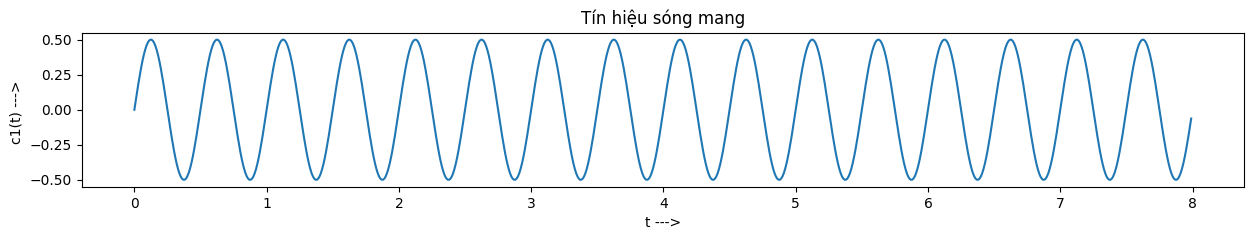

In [220]:
fc = 2                                          # Tần số cắt 
songmang = np.sqrt(2/Tb) * np.sin(2 * np.pi * fc * t)  # Tạo sóng hình sin để làm sóng mang 

fig, ax = plt.subplots(1, 1, figsize=(15, 2))   # Định nghĩa 1 ô đồ thị với kích thước 15x2
fig.subplots_adjust(hspace=0.5)                 # Đặt khoảng trống đồ thị là 0.5  
ax.plot(t, songmang)                            # Vẽ đồ thị sóng mang trục x là mảng t và trục y là mảng c
ax.set_title('Tín hiệu sóng mang')              # Đặt tiêu đề
ax.set_xlabel('t --->')
ax.set_ylabel('c1(t) ---> ')

800 800


Text(0, 0.5, 'c1(t) --->')

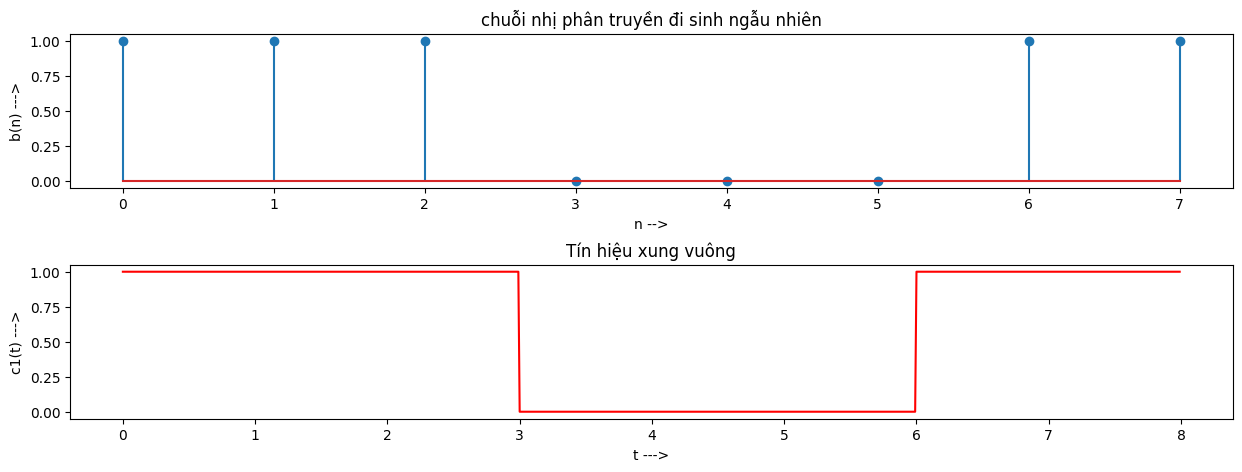

In [221]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))                    # Định nghĩa 1 ô đồ thị với kích thước 15x2
fig.subplots_adjust(hspace=0.5)                                  # Đặt khoảng trống đồ thị là 0.5 
ax[0].stem(m)                                                    # Vẽ cột dấu chấm m là mảng bit nhị phân 
ax[0].set_title('chuỗi nhị phân truyền đi sinh ngẫu nhiên')
ax[0].set_xlabel('n -->')
ax[0].set_ylabel('b(n) --->')

message , not_message = message_signal(m,T)                     # Trả về 2 mảng tương ứng 1,0 

print(len(message), len(not_message))
ax[1].plot(t,message, 'r')                                      # Vẽ dưới dạng xung vuông
ax[1].set_title('Tín hiệu xung vuông')
ax[1].set_xlabel('t --->')
ax[1].set_ylabel('c1(t) --->')

Text(0, 0.5, 'giá trị')

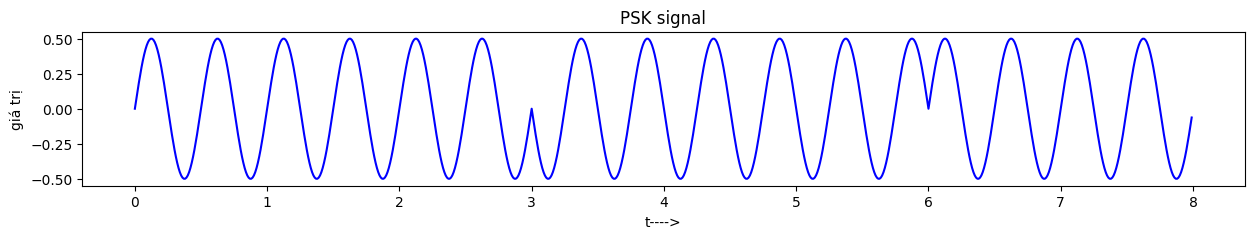

In [222]:

                 
def modulation(message_signal,not_message_signal):                  # Hàm tính toán để mã hóa PSK
    return message_signal*songmang - not_message_signal*songmang    # nhân với sóng hinh sin

psk = modulation(message,not_message)                               # Mã hóa lưu ở psk

fig, ax = plt.subplots(1, 1, figsize=(15, 2))     # Định nghĩa 1 ô đồ thị với kích thước 15x2 
ax.figsize=(15, 5)
ax.plot(t,psk, 'b')
ax.set_title('PSK signal')
ax.set_xlabel('t---->')
ax.set_ylabel('giá trị')

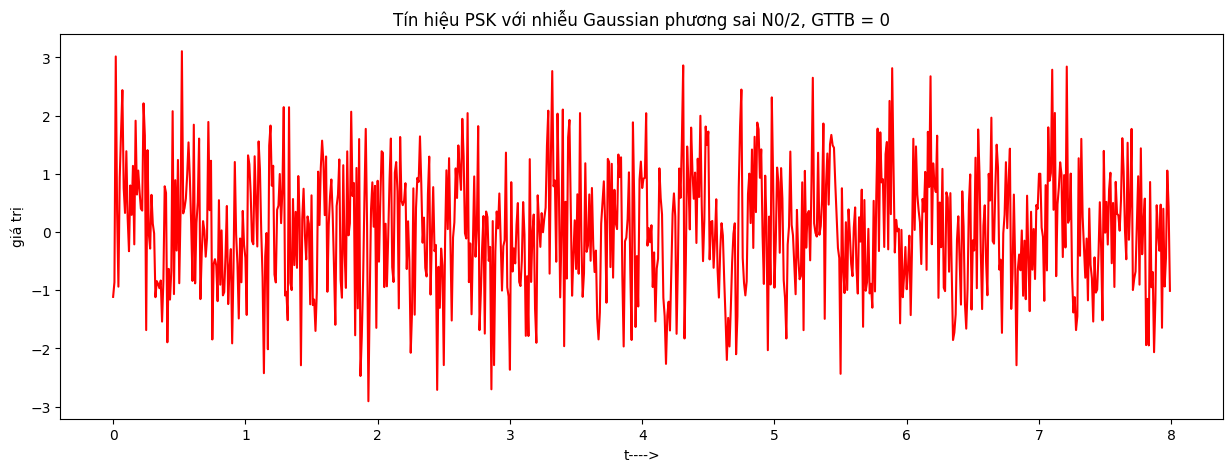

In [223]:
# thêm nhiễu Gaussian với phương sai N0/2, giá trị trung bình = 0
N0 = 2
noise = np.random.normal(0, np.sqrt(N0/2), psk.shape)           # Tạo ra mảng noise theo phân phối Gaussian với GTTB và Phương sai được chỉ định
psk_noisy = psk + noise #r(t) = s(t) + n(t)                     # kích thước noise sẽ bằng kích thước psk

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(t, psk_noisy, 'r')
ax.set_title('Tín hiệu PSK với nhiễu Gaussian phương sai N0/2, GTTB = 0')
ax.set_xlabel('t---->')
ax.set_ylabel('giá trị')
plt.show()



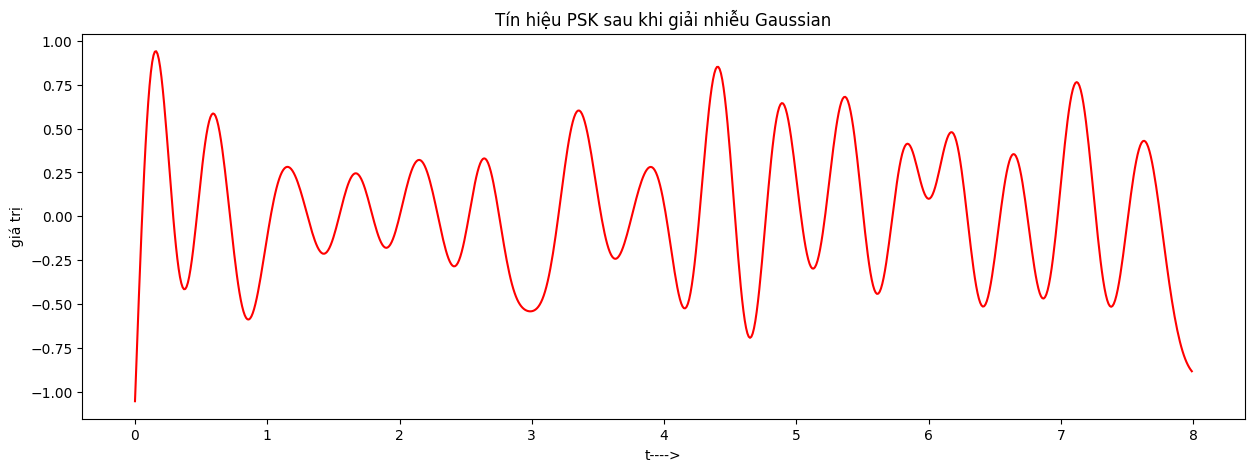

In [224]:
# loại bỏ nhiễu Gaussian từ tín hiệu 
def gaussian_noise_cancellation(signal, cutoff=0.05, order=5):          # order = 5 cho biết thứ tự bộ lọc Butterworth
    b, a = butter(order, cutoff, btype='low', analog=False)             # btype định nghĩa bộ lọc thông thấp hay cao, analog định nghĩa kiểu bộ lọc analog hay digital
    filtered_signal = filtfilt(b, a, signal)                            # lọc tín hiệu signal, lọc chạy 2 chiều để đảm bảo tín hiệu lọc đều và ko bị giảm giá trị
    return filtered_signal                                              # trả biến 

filtered_signal = gaussian_noise_cancellation(psk_noisy)                # lệnh gọi
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(t, filtered_signal, 'r')
ax.set_title('Tín hiệu PSK sau khi giải nhiễu Gaussian')
ax.set_xlabel('t---->')
ax.set_ylabel('giá trị')
plt.show()

Text(0, 0.5, 'Giá trị')

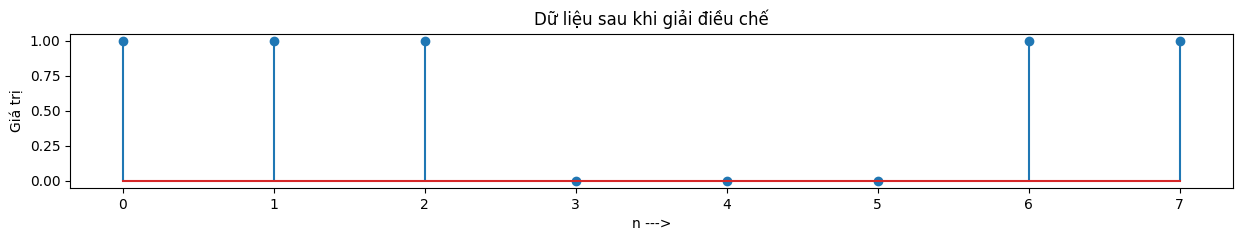

In [225]:
def demodulation(filtered_signal,N):                                # giải mã tín hiệu nhận được
    start = 0
    end = 100
    demod = np.zeros(N)
    for i in range(N):
        x = np.sum(songmang[start:end] * filtered_signal[start:end])
        if x > 0:
            demod[i] = 1
        else:
            demod[i] = 0
        start += 100
        end += 100
    return demod
# Nếu tín hiệu mẫu trùng với sóng sin được sử dụng, thì tổng của tích sóng sẽ lớn, 
# còn nếu tín hiệu mẫu không trùng với sóng sin được sử dụng, tổng của tích sóng sẽ nhỏ.
# Để tính tổng này, chúng ta dùng vòng lặp để chạy qua mỗi giá trị của N, 
# tính tổng với khoảng tín hiệu tương ứng, rồi cập nhật giá trị start và end cho lần chạy tiếp theo của vòng lặp.

fig, ax = plt.subplots(1, 1, figsize=(15, 2))
demod = demodulation(filtered_signal,N)

ax.stem(demod)
ax.set_title("Dữ liệu sau khi giải điều chế")
ax.set_xlabel("n --->")
ax.set_ylabel("Giá trị")
    

Text(0, 0.5, 'b(n)')

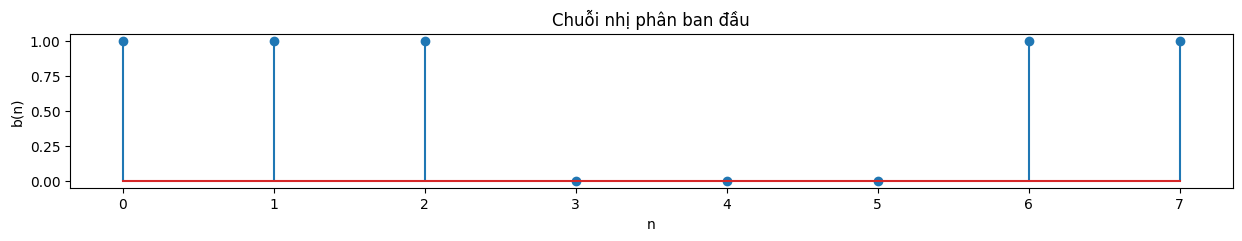

In [226]:
fig, ax = plt.subplots(1, figsize=(15, 2))          # Vẽ lại tín hiệu ban đầu 
fig.subplots_adjust(hspace=0.5)

ax.stem(m)
ax.set_title('Chuỗi nhị phân ban đầu')
ax.set_xlabel('n')
ax.set_ylabel('b(n)')

In [227]:
def calculate_bit_error_rate(bitBanDau, bitNhanDuoc):
    num_errors = 0
    for i in range(len(bitBanDau)):
        if bitBanDau[i] != bitNhanDuoc[i]:
            num_errors += 1
    ber = num_errors / len(bitBanDau)
    return ber


In [228]:
bitBanDau = m
bitNhanDuoc = demod
ber = calculate_bit_error_rate(bitBanDau, bitNhanDuoc)
print("Xác xuất lỗi bit: {:.2f}%".format(ber * 100))


Xác xuất lỗi bit: 0.00%
